In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [8]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
print(data.describe())
print(data.shape)

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [10]:
fraud_cases = data[data['Class']  == 1]
valid_cases = data[data['Class']  == 0]
outlier_fraction = len(fraud_cases) / float(len(valid_cases))
print('Outlier fraction = ', outlier_fraction)
print('No. of Fraud cases = ', len(fraud_cases))
print('No. of Valid cases = ', len(valid_cases))

Outlier fraction =  0.0017304750013189597
No. of Fraud cases =  492
No. of Valid cases =  284315


In [11]:
print('Amount details of the fraud transactions:')
fraud_cases.Amount.describe()

Amount details of the fraud transactions:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
print('Amount details of the Valid transactions:')
valid_cases.Amount.describe()

Amount details of the Valid transactions:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:>

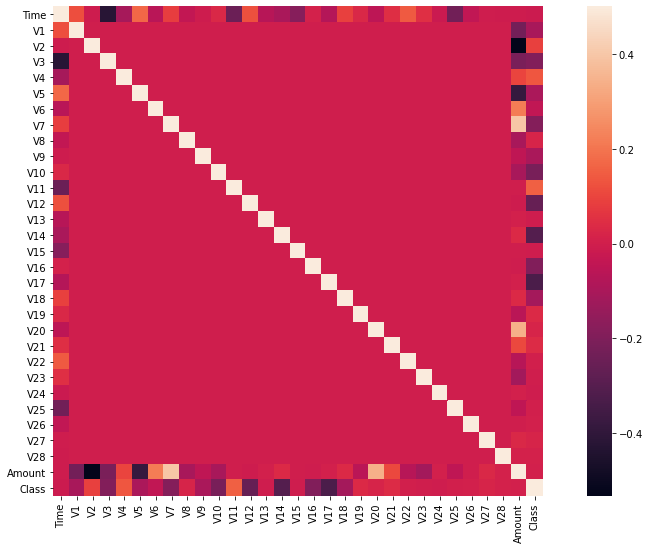

In [21]:
fig = plt.figure(figsize = (16,9))
corr = data.corr()
sns.heatmap(data.corr(), vmax = .5, square = True)

In [15]:
X = data.drop(["Class"], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
xdata = X.values
ydata = Y.values

(284807, 30)
(284807,)


In [16]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xdata,ydata,test_size = 0.2, random_state = 42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

In [19]:
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix,matthews_corrcoef

n_outliers = len(fraud_cases)
n_errors = (yTest != yPred).sum()

print("The model used here is Random Forest Classifier Model.")

acc = accuracy_score(yTest, yPred)
print("The accuracy score is: ", acc)

prec = precision_score(yTest, yPred)
print("The precision score is: ", prec)

f1 = f1_score(yTest, yPred)
print("The f1 score is: ", f1)

rec = recall_score(yTest, yPred)
print("The recall score is: ", rec)

mc = matthews_corrcoef(yTest,yPred)
print("The Matthews Correlation Coeff is: ", mc)



The model used here is Random Forest Classifier Model.
The accuracy score is:  0.9996137776061234
The precision score is:  0.9871794871794872
The f1 score is:  0.8750000000000001
The recall score is:  0.7857142857142857
The Matthews Correlation Coeff is:  0.8805302991855358


Text(0.5, 1.0, 'Confusion Matrix')

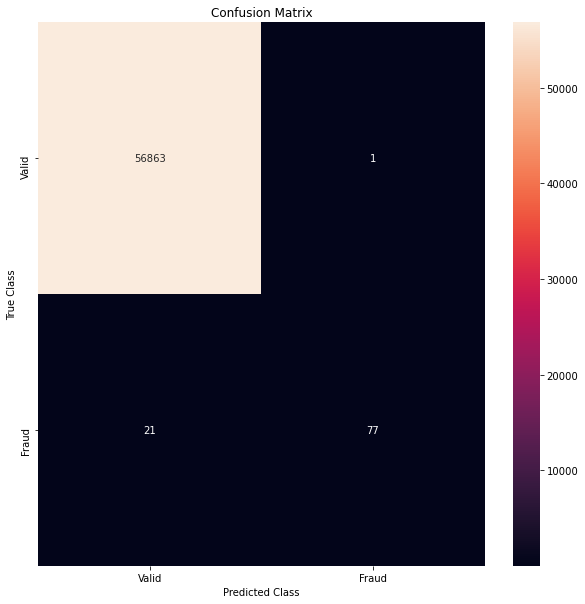

In [24]:
con_matrix = confusion_matrix(yTest, yPred)
LABELS = ['Valid', 'Fraud']
plt.figure(figsize = (10,10))
sns.heatmap(con_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')